# **Creating the model**

1. [Variable Distribution](#Variable-Distribution)
2. [Log Normalization](#Log-Normalization)
3. [Heatmap](#Heatmap)
4. [OLS](#OLS)
5. [Training and Testing with MSE and MAE](#Training-and-Testing)
6. [Cross-Validation](#Cross-Validation)

In [70]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

cleandata = pd.read_csv('cleaned_kc_house_data.csv')

data = pd.read_csv('kc_house_data.csv')

In [137]:
data_pred = (cleandata[['price', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement',
                        'sqft_living15', 'sqft_lot15']]).astype(int)
target = ['price']

## Variable Distribution

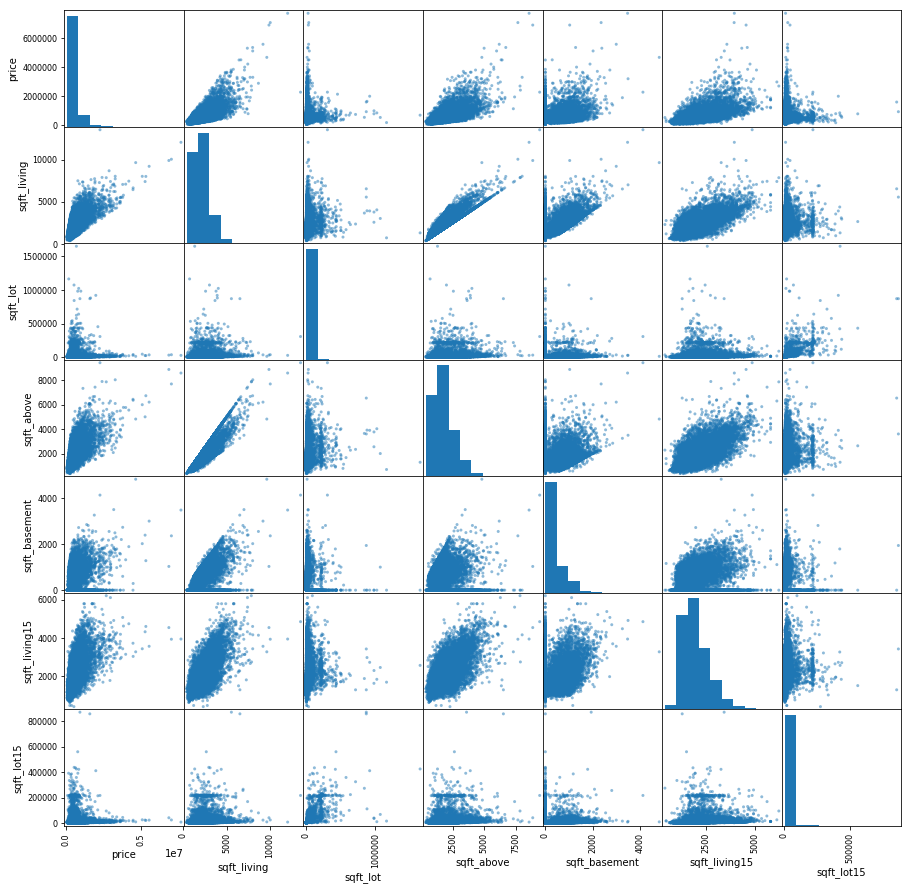

In [141]:
predictors = '+'.join(data_pred)
formula = target[0] + "~" + predictors
model = ols(formula=formula, data=data_pred).fit()
model.summary()

#predictors
#target
pd.plotting.scatter_matrix(data_pred,figsize = [15, 15]);
#data_pred

## Log Normalization

In [5]:
# Min-Max Scaling, Standardization, Mean Normalization, Unit/Vector Transformation 
# can be explored as possibilities in the future

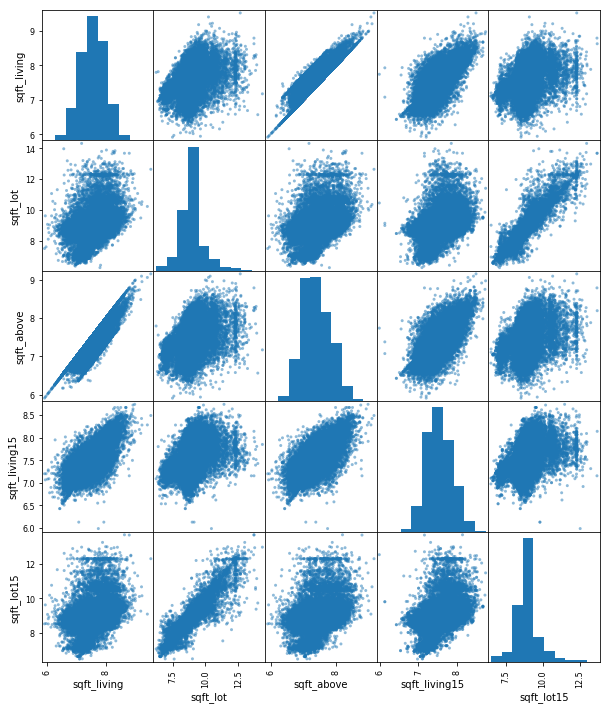

In [151]:
#Using log normalization to closer resemble a normal distribution.
normalize = ['sqft_living', 'sqft_lot', 'sqft_above',
            'sqft_living15', 'sqft_lot15']
#I left out basement because the majority of the value_counts was 0
for feat in normalize:
    df[feat] = cleandata[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df[normalize], figsize=(10,12));

## Heatmap

In [33]:
#grouped heatmap to have all sqft metrics next to each other for easier comparison
#I also look at variables outside the scope of the square footage model to gain insight into our location models
data_heatmap = data[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'floors', 
                     'waterfront', 'view', 'condition', 'grade','yr_built', 
                     'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
                     'sqft_lot15', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement',]]

In [34]:
data_heatmap.corr()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living,sqft_lot,sqft_above
id,1.000000,-0.016772,0.001150,0.005162,0.018608,-0.004176,0.011592,-0.023803,0.008188,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.012241,-0.131911,-0.010799
price,-0.016772,1.000000,0.308787,0.525906,0.256804,0.276295,0.395734,0.036056,0.667951,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.701917,0.089876,0.605368
bedrooms,0.001150,0.308787,1.000000,0.514508,0.177944,-0.002386,0.078523,0.026496,0.356563,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.578212,0.032471,0.479386
bathrooms,0.005162,0.525906,0.514508,1.000000,0.502582,0.067282,0.186451,-0.126479,0.665838,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.755758,0.088373,0.686668
floors,0.018608,0.256804,0.177944,0.502582,1.000000,0.021883,0.028436,-0.264075,0.458794,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.353953,-0.004814,0.523989
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.021883,1.000000,0.406654,0.017642,0.087383,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.110230,0.023143,0.075463
view,0.011592,0.395734,0.078523,0.186451,0.028436,0.406654,1.000000,0.045735,0.249727,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.282532,0.075298,0.166299
condition,-0.023803,0.036056,0.026496,-0.126479,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.059445,-0.008830,-0.158904
grade,0.008188,0.667951,0.356563,0.665838,0.458794,0.087383,0.249727,-0.146896,1.000000,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981,0.762779,0.114731,0.756073
yr_built,0.021617,0.053953,0.155670,0.507173,0.489193,-0.026079,-0.054564,-0.361592,0.447865,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.318152,0.052946,0.424037


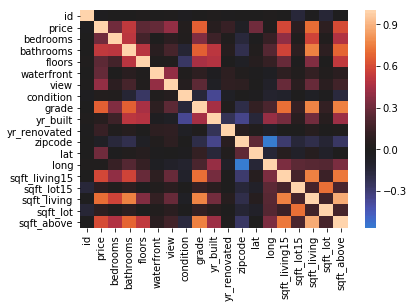

In [35]:
sns.heatmap(data_heatmap.corr(), center=0);

In [ ]:
#latitude isn't a strong correlation with zipcode, and longitude is inversely correlated,
#perhaps because the shape of King County is tall but narrow

In [186]:
#correlations of our dataset once it has been cleaned and categorical variables dropped
cleandata_heatmap = cleandata[['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 
                               'sqft_living15', 'sqft_lot15']]

In [187]:
cleandata_heatmap.corr()


,price,sqft_living,sqft_lot,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.701917,0.089876,0.321108,0.585241,0.082845
sqft_living,0.701917,1.000000,0.173453,0.428660,0.756402,0.184342
sqft_lot,0.089876,0.173453,1.000000,0.015031,0.144763,0.718204
sqft_basement,0.321108,0.428660,0.015031,1.000000,0.199288,0.015885
sqft_living15,0.585241,0.756402,0.144763,0.199288,1.000000,0.183515
sqft_lot15,0.082845,0.184342,0.718204,0.015885,0.183515,1.000000


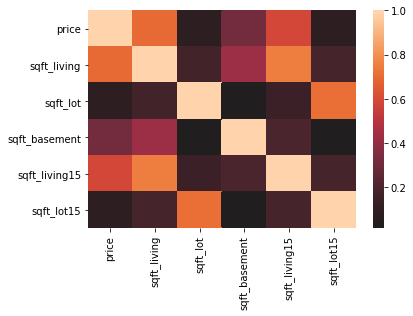

In [188]:
sns.heatmap(cleandata_heatmap.corr(), center=0);

## OLS

In [157]:
#The essence of my model will be attempting to answer the question of 
#if measures of a house's own square footage are more important
#than measures of the neighbor's square footage
sqft_metrics_within = cleandata[['sqft_living', 'sqft_lot', 'sqft_basement']]
sqft_metrics_without = cleandata[['sqft_living15', 'sqft_lot15']]
y = cleandata['price']
y1 = cleandata['price']
sqft_metrics_within.shape
sqft_metrics_without.shape

(21597, 2)

In [158]:
cleandata.describe()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,2080.321850,1.509941e+04,1788.596842,285.716581,47.560093,-122.213982,1986.620318,12758.283512,...,0.013335,0.002639,0.020651,0.011761,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678
std,2.876736e+09,3.673681e+05,918.106125,4.141264e+04,827.759761,439.819830,0.138552,0.140724,685.230472,27274.441950,...,0.114708,0.051307,0.142216,0.107811,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,1430.000000,5.040000e+03,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,2550.000000,1.068500e+04,2210.000000,550.000000,47.678000,-122.125000,2360.000000,10083.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
sqft_metrics_without.shape

(21597, 2)

In [160]:
#R squared is higher for sqft_within, although Fstat is lower (than sqft_without ...see below for comparison)
#Refined model by removing sqft_above as a metric because its P-value was greater than .05 (it was .142)
model = sm.OLS(y, sqft_metrics_within).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 3.763e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:43:47   Log-Likelihood:            -3.0008e+05
No. Observations:               21597   AIC:                         6.002e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     261.4732      1.087    240.656      0.000     259.344     263.603
sqft_lot         -0.2707      0.044     -6.184      0.000      -0.356      -0.185
sqft_basement    24.8016      4.447      5.577      0.000      16.085      33.519
==============================================================================
Omnibus:                    15815.760   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           662156.048
Skew:                           3.075   Prob(JB):                         0.00
Kurtosis:                      29.420   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
model = sm.OLS(y, sqft_metrics_without).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 4.077e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:43:47   Log-Likelihood:            -3.0294e+05
No. Observations:               21597   AIC:                         6.059e+05
Df Residuals:                   21595   BIC:                         6.059e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living15   278.5002      1.087    256.195      0.000     276.369     280.631
sqft_lot15       -0.3206      0.076     -4.226      0.000      -0.469      -0.172
==============================================================================
Omnibus:                    20919.274   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2133317.049
Skew:                           4.466   Prob(JB):                         0.00
Kurtosis:                      50.863   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Training and Testing

In [162]:
# Setting up two parallel sets of test and training data, one for each within/without metric

In [163]:
x_train, x_test, y_train, y_test = train_test_split(sqft_metrics_within, y, test_size = 0.2)

In [164]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [165]:
x1_train, x1_test, y1_train, y1_test = train_test_split(sqft_metrics_without, y1, test_size = 0.2)

In [166]:
print(len(x1_train), len(x1_test), len(y1_train), len(y1_test))

17277 4320 17277 4320


In [167]:
linreg1 = LinearRegression()
linreg1.fit(x_train, y_train)

y_hat_train = linreg1.predict(x_train)
y_hat_test = linreg1.predict(x_test)

In [168]:
linreg2 = LinearRegression()
linreg2.fit(x1_train, y1_train)

y1_hat_train = linreg2.predict(x1_train)
y1_hat_test = linreg2.predict(x1_test)

In [169]:
# the four measures of square footage within a single property appear to have a 
# significantly higher score
model = LinearRegression().fit(sqft_metrics_within, y)
print(model.score(sqft_metrics_within, y))
model1 = LinearRegression().fit(sqft_metrics_without, y1)
print(model1.score(sqft_metrics_without, y1))

0.49414625841304816
0.34313126558269624


In [189]:
#log-normalized variables include columns from within and without, 
#and so the score is in the middle of the models above
x_train, x_test, y_train, y_test = train_test_split(df[normalize], y, test_size = 0.2)
model = LinearRegression().fit(df[normalize], y)
print(model.score(df[normalize], y))

0.3965735492331866


In [170]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

### MSE

In [171]:
#Mean Squared Error is extremely high due to the high standard deviation of price in the dataset

In [172]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 66624475575.98741
Test Mean Squared Error: 74912563012.68956


In [173]:
train_mse = mean_squared_error(y1_train, y1_hat_train)
test_mse = mean_squared_error(y1_test, y1_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 86899215674.53073
Test Mean Squared Error: 95640619513.20694


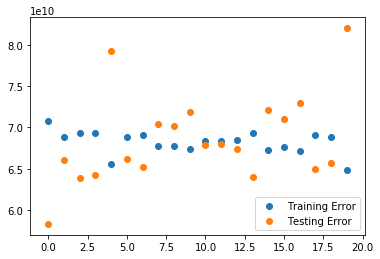

In [174]:
#Plotting the training and testing errors for the "within" metrics using a for loop
num = 20
train_err = []
test_err = []
for i in range(num):
    x_train, x_test, y_train, y_test = train_test_split(sqft_metrics_within, y, test_size=0.2)
    linreg1.fit(x_train, y_train)
    y_hat_train = linreg1.predict(x_train)
    y_hat_test = linreg1.predict(x_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

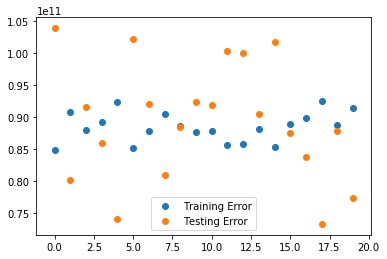

In [175]:
#Plotting the training and testing errors for the "without" metrics using a for loop
num = 20
train_err = []
test_err = []
for i in range(num):
    x1_train, x1_test, y1_train, y1_test = train_test_split(sqft_metrics_without, y1, test_size=0.2)
    linreg2.fit(x1_train, y1_train)
    y1_hat_train = linreg2.predict(x1_train)
    y1_hat_test = linreg2.predict(x1_test)
    train_err.append(mean_squared_error(y1_train, y1_hat_train))
    test_err.append(mean_squared_error(y1_test, y1_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

### MAE

In [176]:
#MAE - Mean Absolute Error -  Seems to be more valuable because of the price metric's high standard deviation
mean_absolute_error(y_test, y_hat_test)
mean_absolute_error(y_train, y_hat_train)

170158.88038258936

In [177]:
mean_absolute_error(y1_test, y1_hat_test)
mean_absolute_error(y1_train, y1_hat_train)

188781.54274154778

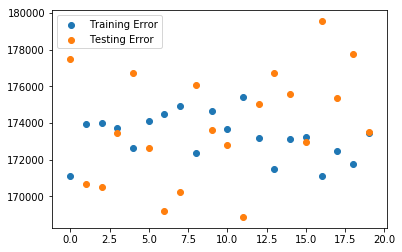

In [178]:
#Repeating the process for the MAE for both within and without square footage variables
num = 20
train_err = []
test_err = []
for i in range(num):
    x_train, x_test, y_train, y_test = train_test_split(sqft_metrics_within, y, test_size=0.2)
    linreg1.fit(x_train, y_train)
    y_hat_train = linreg1.predict(x_train)
    y_hat_test = linreg1.predict(x_test)
    train_err.append(mean_absolute_error(y_train, y_hat_train))
    test_err.append(mean_absolute_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

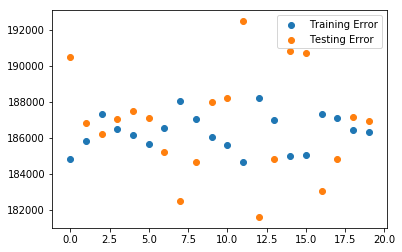

In [179]:
num = 20
train_err = []
test_err = []
for i in range(num):
    x1_train, x1_test, y1_train, y1_test = train_test_split(sqft_metrics_without, y1, test_size=0.2)
    linreg2.fit(x1_train, y1_train)
    y1_hat_train = linreg2.predict(x1_train)
    y1_hat_test = linreg2.predict(x1_test)
    train_err.append(mean_absolute_error(y1_train, y1_hat_train))
    test_err.append(mean_absolute_error(y1_test, y1_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

## Cross-Validation

In [180]:
#Again, going by MAE is better than MSE

In [181]:
# cv_5_results = np.mean(cross_val_score(linreg1, sqft_metrics_within, y, cv=5, scoring="neg_mean_squared_error"))
# cv_10_results = np.mean(cross_val_score(linreg1, sqft_metrics_within, y, cv=10, scoring="neg_mean_squared_error"))
# cv_20_results = np.mean(cross_val_score(linreg1, sqft_metrics_within, y, cv=20, scoring="neg_mean_squared_error"))
# print(cv_5_results)
# print(cv_10_results)
# print(cv_20_results)

In [182]:
# cv1_5_results = np.mean(cross_val_score(linreg2, sqft_metrics_without, y1, cv=5, scoring="neg_mean_squared_error"))
# cv1_10_results = np.mean(cross_val_score(linreg2, sqft_metrics_without, y1, cv=10, scoring="neg_mean_squared_error"))
# cv1_20_results = np.mean(cross_val_score(linreg2, sqft_metrics_without, y1, cv=20, scoring="neg_mean_squared_error"))
# print(cv1_5_results)
# print(cv1_10_results)
# print(cv1_20_results)

In [183]:
cv_5_results = np.mean(cross_val_score(linreg1, sqft_metrics_within, y, cv=5, scoring="neg_mean_absolute_error"))
cv_10_results = np.mean(cross_val_score(linreg1, sqft_metrics_within, y, cv=10, scoring="neg_mean_absolute_error"))
cv_20_results = np.mean(cross_val_score(linreg1, sqft_metrics_within, y, cv=20, scoring="neg_mean_absolute_error"))
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-173777.17827228116
-173747.7992601606
-173644.71320845376


In [184]:
cv1_5_results = np.mean(cross_val_score(linreg2, sqft_metrics_without, y1, cv=5, scoring="neg_mean_absolute_error"))
cv1_10_results = np.mean(cross_val_score(linreg2, sqft_metrics_without, y1, cv=10, scoring="neg_mean_absolute_error"))
cv1_20_results = np.mean(cross_val_score(linreg2, sqft_metrics_without, y1, cv=20, scoring="neg_mean_absolute_error"))
print(cv1_5_results)
print(cv1_10_results)
print(cv1_20_results)

-186977.23882091732
-186970.75027538088
-186724.40741423814


In [185]:
#Level-Up: split the dataset on median price and run each group through the MAE model again